### 戦績データを読み込む

- 条件を指定してデータベースから戦績データを読み込みます
- 読み込んだデータは pandas の DataFrame 形式で格納されます

ここでは 2023/5/1 ~ 2023/5/3 の期間内のXマッチのデータを取得しています。  
データのカラムは stat.ink に記載されている[スキーマ情報](https://github.com/fetus-hina/stat.ink/wiki/Spl3-%EF%BC%8D-CSV-Schema-%EF%BC%8D-Battle)に対応しています。  
例外として `date` カラムはデータが格納されている大本の csv ファイル名に対応しています。

In [1]:
import datetime as dt
import packages.db as db
import packages.definitions as d

lobby = d.Lobby.XMATCH
date_from = dt.date(2023, 5, 4)
date_to = dt.date(2023, 5, 5)
battles = db.load_battles(lobby=lobby, date_from=date_from, date_to=date_to)
battles

,season,period,date,game-ver,lobby,mode,stage,time,win,knockout,...,B4-death,B4-special,B4-inked,B4-abilities,medal1-grade,medal1-name,medal2-grade,medal2-name,medal3-grade,medal3-name
0,Fresh Season 2023,2023-05-04 04:00:00,2023-05-04,3.1.1,xmatch,hoko,yunohana,313,bravo,False,...,10,4,1032,"{""swim_speed_up"":1.3,""special_charge_up"":1,""sp...",silver,#1 Zipcaster User,silver,#2 Turf Inker,None,None
1,Fresh Season 2023,2023-05-04 08:00:00,2023-05-04,3.1.1,xmatch,area,manta,236,alpha,True,...,9,2,965,"{""quick_respawn"":2.2,""special_charge_up"":0.9,""...",gold,#1 Overall Splatter,gold,#1 Splat Zone Guard,gold,#1 Super Jump Spot
2,Fresh Season 2023,2023-05-03 04:00:00,2023-05-04,3.1.1,xmatch,area,kusaya,155,alpha,True,...,3,2,722,"{""swim_speed_up"":1,""intensify_action"":0.9,""qui...",gold,#1 Overall Splatter,gold,#1 Enemy Splatter,gold,#1 Splat Zone Guard
3,Fresh Season 2023,2023-05-03 04:00:00,2023-05-04,3.1.1,xmatch,area,mahimahi,101,alpha,True,...,5,0,273,"{""quick_respawn"":1.6,""quick_super_jump"":1,""ink...",gold,#1 Splat Zone Guard,gold,#1 Popular Target,gold,#1 Splat Zone Inker
4,Fresh Season 2023,2023-05-03 04:00:00,2023-05-04,3.1.1,xmatch,area,mahimahi,89,bravo,True,...,1,1,394,"{""ink_saver_main"":2.1,""ink_saver_sub"":1,""ink_r...",gold,#1 Popular Target,gold,#1 Turf Inker,silver,First Splat!
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,Fresh Season 2023,2023-05-05 22:00:00,2023-05-05,3.1.1,xmatch,yagura,namero,300,bravo,False,...,8,3,841,"{""swim_speed_up"":1.9,""quick_super_jump"":0.9,""i...",gold,#1 Turf Inker,gold,Record-Score Setter,silver,#2 Super Jump Spot
3305,Fresh Season 2023,2023-05-05 22:00:00,2023-05-05,3.1.1,xmatch,yagura,sumeshi,148,alpha,True,...,5,1,581,"{""ink_saver_main"":1,""swim_speed_up"":1,""special...",silver,#2 Turf Inker,None,None,None,None
3306,Fresh Season 2023,2023-05-05 22:00:00,2023-05-05,3.1.1,xmatch,yagura,sumeshi,300,bravo,False,...,3,3,881,"{""ink_saver_main"":1.9,""quick_super_jump"":1.9,""...",gold,#1 Splat Assister,silver,#2 Turf Inker,silver,#1 Killer Wail 5.1 User
3307,Fresh Season 2023,2023-05-05 22:00:00,2023-05-05,3.1.1,xmatch,yagura,namero,113,bravo,True,...,2,2,533,"{""quick_respawn"":3.1,""quick_super_jump"":0.6,""h...",gold,#1 Overall Splatter,gold,#1 Popular Target,gold,#1 Turf Inker


In [2]:
import packages.utils as u

players = u.to_players(battles)
players

,season,period,date,game-ver,lobby,mode,stage,time,win,knockout,...,kill-assist,kill,assist,death,special,inked,abilities,sub-weapon,special-weapon,weapon-type
0,Fresh Season 2023,2023-05-04 04:00:00,2023-05-04,3.1.1,xmatch,hoko,yunohana,313,False,False,...,12,9,3,9,5,1285,"{""ink_saver_sub"":3.2,""swim_speed_up"":1,""specia...",torpedo,hopsonar,shooter
1,Fresh Season 2023,2023-05-04 08:00:00,2023-05-04,3.1.1,xmatch,area,manta,236,True,True,...,9,5,4,1,5,1435,"{""ink_saver_sub"":2.6,""swim_speed_up"":1.3,""ink_...",torpedo,hopsonar,shooter
2,Fresh Season 2023,2023-05-03 04:00:00,2023-05-04,3.1.1,xmatch,area,kusaya,155,True,True,...,5,3,2,3,4,1011,"{""ink_saver_sub"":1.6,""special_charge_up"":1.6,""...",poisonmist,amefurashi,shooter
3,Fresh Season 2023,2023-05-03 04:00:00,2023-05-04,3.1.1,xmatch,area,mahimahi,101,True,True,...,7,5,2,1,2,585,"{""ink_saver_main"":2,""swim_speed_up"":1.3,""run_s...",pointsensor,amefurashi,slosher
4,Fresh Season 2023,2023-05-03 04:00:00,2023-05-04,3.1.1,xmatch,area,mahimahi,89,False,True,...,4,3,1,4,2,434,"{""ink_saver_sub"":3.5,""special_charge_up"":1.3,""...",torpedo,hopsonar,shooter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23158,Fresh Season 2023,2023-05-05 22:00:00,2023-05-05,3.1.1,xmatch,yagura,namero,300,True,False,...,13,7,6,8,3,841,"{""swim_speed_up"":1.9,""quick_super_jump"":0.9,""i...",splashbomb,tripletornado,slosher
23159,Fresh Season 2023,2023-05-05 22:00:00,2023-05-05,3.1.1,xmatch,yagura,sumeshi,148,False,True,...,1,1,0,5,1,581,"{""ink_saver_main"":1,""swim_speed_up"":1,""special...",robotbomb,decoy,shooter
23160,Fresh Season 2023,2023-05-05 22:00:00,2023-05-05,3.1.1,xmatch,yagura,sumeshi,300,True,False,...,8,7,1,3,3,881,"{""ink_saver_main"":1.9,""quick_super_jump"":1.9,""...",trap,hopsonar,charger
23161,Fresh Season 2023,2023-05-05 22:00:00,2023-05-05,3.1.1,xmatch,yagura,namero,113,True,True,...,7,7,0,2,2,533,"{""quick_respawn"":3.1,""quick_super_jump"":0.6,""h...",quickbomb,shokuwander,wiper


In [5]:
teams = u.to_teams(battles)
teams

,season,period,date,game-ver,lobby,mode,stage,time,win,knockout,...,P3-inked,P3-abilities,P4-weapon,P4-kill-assist,P4-kill,P4-assist,P4-death,P4-special,P4-inked,P4-abilities
0,Fresh Season 2023,2023-05-04 04:00:00,2023-05-04,3.1.1,xmatch,hoko,yunohana,313,False,False,...,1016,"{""special_charge_up"":2.2,""special_power_up"":1....",wakaba,7,5,2,5,3,1840,"{""ink_saver_sub"":3.5,""ink_recovery_up"":1.6,""ru..."
1,Fresh Season 2023,2023-05-04 08:00:00,2023-05-04,3.1.1,xmatch,area,manta,236,True,True,...,930,"{""ink_saver_sub"":1.9,""intensify_action"":1.6,""i...",jetsweeper_custom,6,6,0,2,4,1052,"{""swim_speed_up"":1.9,""run_speed_up"":1.6,""quick..."
2,Fresh Season 2023,2023-05-03 04:00:00,2023-05-04,3.1.1,xmatch,area,kusaya,155,True,True,...,716,"{""ink_saver_sub"":2,""ink_saver_main"":0.9,""quick...",variableroller,6,5,1,3,3,804,"{""special_power_up"":1.3,""quick_respawn"":1,""ink..."
3,Fresh Season 2023,2023-05-03 04:00:00,2023-05-04,3.1.1,xmatch,area,mahimahi,101,True,True,...,479,"{""swim_speed_up"":1.2,""quick_super_jump"":0.9,""i...",sshooter_collabo,4,2,2,2,2,506,"{""special_charge_up"":0.6,""swim_speed_up"":0.6,""..."
4,Fresh Season 2023,2023-05-03 04:00:00,2023-05-04,3.1.1,xmatch,area,mahimahi,89,False,True,...,319,"{""ink_recovery_up"":1.9,""ink_saver_main"":1.9,""r...",prime_collabo,1,1,0,5,1,301,"{""ink_saver_main"":1.3,""sub_power_up"":0.6,""swim..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6613,Fresh Season 2023,2023-05-05 22:00:00,2023-05-05,3.1.1,xmatch,yagura,namero,300,True,False,...,1318,"{""swim_speed_up"":1.9,""run_speed_up"":0.9,""inten...",bucketslosher,13,7,6,8,3,841,"{""swim_speed_up"":1.9,""quick_super_jump"":0.9,""i..."
6614,Fresh Season 2023,2023-05-05 22:00:00,2023-05-05,3.1.1,xmatch,yagura,sumeshi,148,False,True,...,293,"{""ink_saver_main"":0.9,""ink_recovery_up"":0.6,""q...",nzap89,1,1,0,5,1,581,"{""ink_saver_main"":1,""swim_speed_up"":1,""special..."
6615,Fresh Season 2023,2023-05-05 22:00:00,2023-05-05,3.1.1,xmatch,yagura,sumeshi,300,True,False,...,817,"{""intensify_action"":2.9,""quick_super_jump"":0.6...",liter4k,8,7,1,3,3,881,"{""ink_saver_main"":1.9,""quick_super_jump"":1.9,""..."
6616,Fresh Season 2023,2023-05-05 22:00:00,2023-05-05,3.1.1,xmatch,yagura,namero,113,True,True,...,599,"{""swim_speed_up"":1.8,""run_speed_up"":1,""quick_s...",jimuwiper,7,7,0,2,2,533,"{""quick_respawn"":3.1,""quick_super_jump"":0.6,""h..."


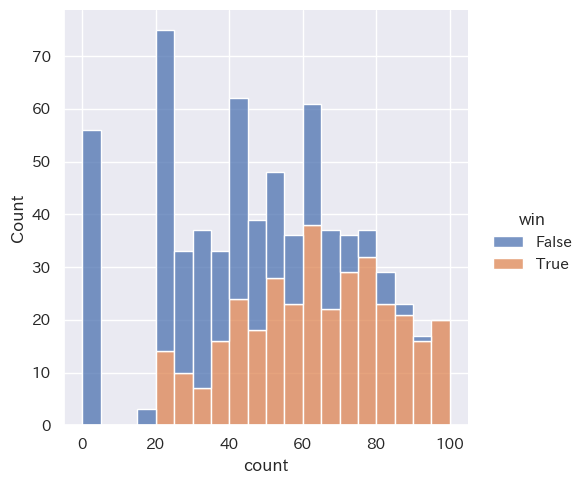

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from packages.japanize import japanize

sns.set_theme()
japanize()

df = teams[(teams["mode"] == "asari") & (~teams["knockout"])]

sns.displot(
    data=df,
    x="count",
    hue="win",
    multiple="stack",
    binwidth=5,
)
plt.show()
